(torch.Size([60000]), torch.Size([60000, 28, 28]), torch.Size([10000]), torch.Size([10000, 28, 28]))
tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.00

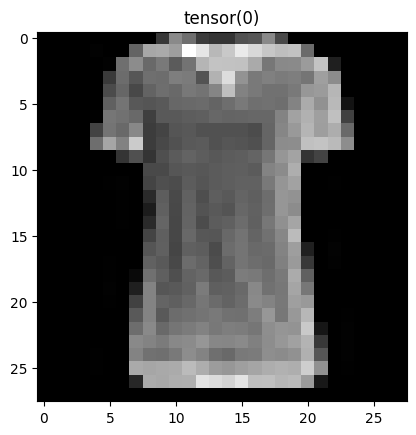

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch 
# 處理資料
class FashionMnistData:
    # 建構子
    def __init__(self,train_data_path,test_data_path):
        # 訓練資料路徑
        self.train_data_path = train_data_path
        # 測試資料路徑
        self.test_data_path = test_data_path
        # 訓練資料
        self.train_data = None
        # 測試資料
        self.test_data = None
        # 訓練影像
        self.train_images = None
        # 訓練標籤
        self.train_labels = None
        # 測試影像
        self.test_images = None
        # 測試標籤
        self.test_labels = None
    # 讀取資料
    def load_data(self):
        # 讀取訓練資料
        self.train_data = pd.read_csv(self.train_data_path)
        # 讀取測試資料
        self.test_data = pd.read_csv(self.test_data_path)
    # 轉換資料型態為tensor
    def preprocess_data(self):
        # 訓練標籤
        self.train_labels = torch.LongTensor(self.train_data.iloc[:, 0].values)
        # 訓練影像
        self.train_images = torch.FloatTensor(self.train_data.iloc[:, 1:].values.reshape(-1,28,28)) / 255.0
        # 測試標籤
        self.test_labels = torch.LongTensor(self.test_data.iloc[:, 0].values)
        # 測試影像
        self.test_images = torch.FloatTensor(self.test_data.iloc[:, 1:].values.reshape(-1,28,28)) / 255.0
    # 取得資料
    def get_data_shape(self):
        return self.train_labels.shape, self.train_images.shape, self.test_labels.shape, self.test_images.shape
    # 隨機顯示訓練資料
    def random_train_image(self):
        # 隨機索引
        random_index = np.random.randint(0, len(self.train_images))
        # 顯示影像
        plt.imshow(self.train_images[random_index].reshape(28,28), cmap='gray')
        # 顯示標籤
        plt.title(self.train_labels[random_index])
        # 顯示影像
        plt.show()
    
# 實例化
data = FashionMnistData('mnistdata/fashion_mnist_train.csv','mnistdata/fashion_mnist_test.csv')
# 讀取資料
data.load_data()
# 轉換資料型態
data.preprocess_data()
# 取得資料形狀
print(data.get_data_shape())
print(data.train_images)
# 隨機顯示訓練資料
data.random_train_image()





In [18]:

import torch.nn as nn
import torch.nn.functional as F
# 使用GPU
class Device:
    def __init__(self):
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        print(f'Using {self.device}')
    def get_device(self):
        return self.device

class MyDNN(nn.Module):
    def __init__(self):
        super(MyDNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.fc2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.fc3 = nn.Linear(128, 10)
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.bn1(self.fc1(x)))
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.fc3(x)
        return x

# 將資料轉移到GPU
class DataToGPU:
    def __init__(self, data, device):
        self.data = data.to(device)
    def get_data(self):
        return self.data
# 實例化
device = Device()
# 實例化模型
model = MyDNN().to(device.get_device())

# 將資料轉移到GPU
train_images = DataToGPU(data.train_images, device.get_device())
train_labels = DataToGPU(data.train_labels, device.get_device())
test_images = DataToGPU(data.test_images, device.get_device())
test_labels = DataToGPU(data.test_labels, device.get_device())
# 顯示資料形狀
print(train_images.get_data().shape, train_labels.get_data().shape, test_images.get_data().shape, test_labels.get_data().shape)





Using cuda
torch.Size([60000, 28, 28]) torch.Size([60000]) torch.Size([10000, 28, 28]) torch.Size([10000])


In [19]:
from torch.utils.data import TensorDataset, DataLoader

# 定義批次大小
batch_size = 32

# 將訓練、測試集資料封包，定義每次訓練迭代資料資訊
train_dataset = TensorDataset(data.train_images.unsqueeze(1), data.train_labels)
test_dataset = TensorDataset(data.test_images.unsqueeze(1), data.test_labels)

# 定義取樣資訓
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)




Epoch [1/10]
Train - Loss: 0.4750, Accuracy: 82.85%, Recall: 0.83
Test - Loss: 0.3780, Accuracy: 85.77%, Recall: 0.86
--------------------------------------------------
Epoch [2/10]
Train - Loss: 0.3695, Accuracy: 86.42%, Recall: 0.86
Test - Loss: 0.3502, Accuracy: 86.88%, Recall: 0.87
--------------------------------------------------
Epoch [3/10]
Train - Loss: 0.3301, Accuracy: 87.66%, Recall: 0.88
Test - Loss: 0.3048, Accuracy: 88.58%, Recall: 0.89
--------------------------------------------------
Epoch [4/10]
Train - Loss: 0.3049, Accuracy: 88.55%, Recall: 0.89
Test - Loss: 0.3233, Accuracy: 88.01%, Recall: 0.88
--------------------------------------------------
Epoch [5/10]
Train - Loss: 0.2806, Accuracy: 89.54%, Recall: 0.90
Test - Loss: 0.2999, Accuracy: 88.79%, Recall: 0.89
--------------------------------------------------
Epoch [6/10]
Train - Loss: 0.2598, Accuracy: 90.30%, Recall: 0.90
Test - Loss: 0.3077, Accuracy: 88.63%, Recall: 0.89
-------------------------------------

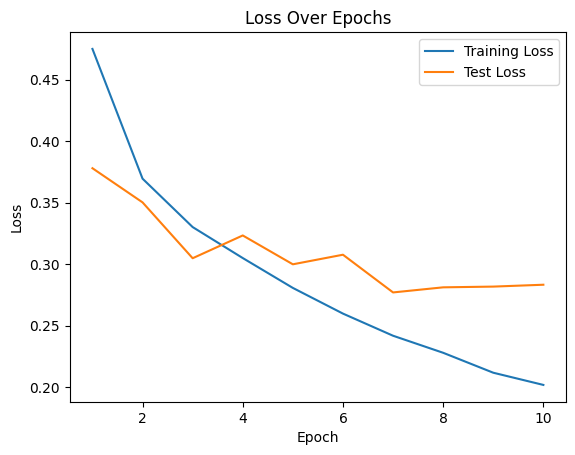

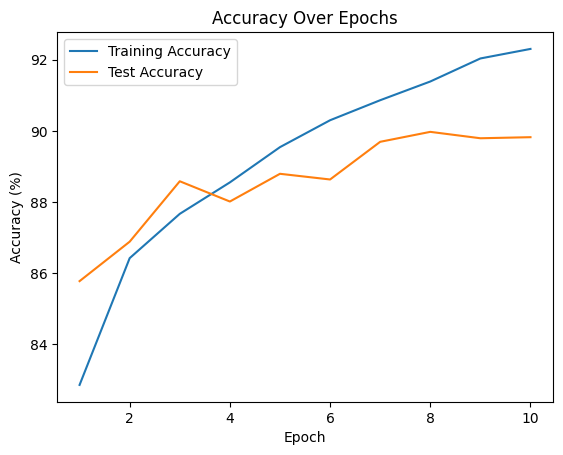

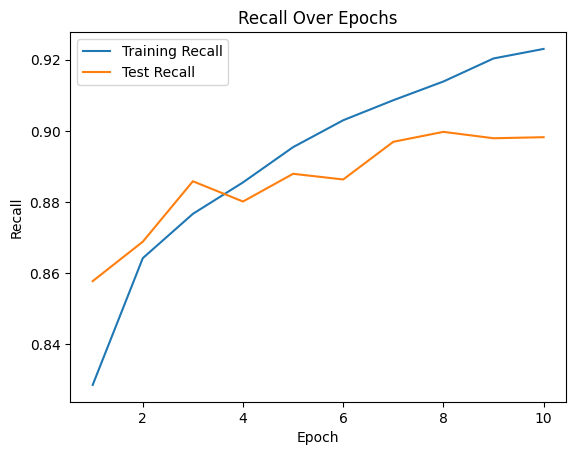

In [20]:
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score

# 假設你的模型和其他相關變數已經定義並在 GPU 上

class ModelTrainer:
    def __init__(self, model, train_loader, test_loader, device, lr=0.001):
        self.model = model.to(device)
        self.train_loader = train_loader
        self.test_loader = test_loader
        self.device = device
        self.criterion = torch.nn.CrossEntropyLoss()
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=lr)
        self.train_losses, self.train_accuracies, self.train_recalls = [], [], []
        self.test_losses, self.test_accuracies, self.test_recalls = [], [], []

    def train_epoch(self):
        self.model.train()  # 設置為訓練模式
        running_loss, correct, total = 0.0, 0, 0
        all_labels, all_preds = [], []

        for images, labels in self.train_loader:
            images, labels = images.to(self.device), labels.to(self.device)
            images = images.view(-1, 28 * 28)  # 展開影像以適應全連接層
            
            self.optimizer.zero_grad()
            outputs = self.model(images)
            loss = self.criterion(outputs, labels)
            loss.backward()
            self.optimizer.step()

            running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

            # 移回 CPU 以便計算 recall
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

        # 計算並存儲該 epoch 的損失、準確率和召回率
        epoch_loss = running_loss / total
        epoch_accuracy = 100 * correct / total
        epoch_recall = recall_score(all_labels, all_preds, average="macro")

        self.train_losses.append(epoch_loss)
        self.train_accuracies.append(epoch_accuracy)
        self.train_recalls.append(epoch_recall)

    def evaluate_epoch(self):
        self.model.eval()  # 設置為評估模式
        test_loss, correct, total = 0.0, 0, 0
        all_labels, all_preds = [], []

        with torch.no_grad():
            for images, labels in self.test_loader:
                images, labels = images.to(self.device), labels.to(self.device)
                images = images.view(-1, 28 * 28)
    
                
                outputs = self.model(images)
                loss = self.criterion(outputs, labels)
                test_loss += loss.item() * images.size(0)
                
                _, predicted = torch.max(outputs, 1)
                correct += (predicted == labels).sum().item()
                total += labels.size(0)

                all_labels.extend(labels.cpu().numpy())
                all_preds.extend(predicted.cpu().numpy())

        # 計算並存儲該 epoch 的測試損失、準確率和召回率
        epoch_loss = test_loss / total
        epoch_accuracy = 100 * correct / total
        epoch_recall = recall_score(all_labels, all_preds, average="macro")

        self.test_losses.append(epoch_loss)
        self.test_accuracies.append(epoch_accuracy)
        self.test_recalls.append(epoch_recall)

    def train(self, num_epochs=10):
        for epoch in range(num_epochs):
            self.train_epoch()  # 執行一次訓練
            self.evaluate_epoch()  # 執行一次評估
            
            print(f"Epoch [{epoch + 1}/{num_epochs}]")
            print(f"Train - Loss: {self.train_losses[-1]:.4f}, "
                  f"Accuracy: {self.train_accuracies[-1]:.2f}%, Recall: {self.train_recalls[-1]:.2f}")
            print(f"Test - Loss: {self.test_losses[-1]:.4f}, "
                  f"Accuracy: {self.test_accuracies[-1]:.2f}%, Recall: {self.test_recalls[-1]:.2f}")
            print("-" * 50)

    def plot_metrics(self):
        epochs = range(1, len(self.train_losses) + 1)

        # 繪製訓練與測試損失
        plt.figure()
        plt.plot(epochs, self.train_losses, label="Training Loss")
        plt.plot(epochs, self.test_losses, label="Test Loss")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.title("Loss Over Epochs")
        plt.legend()
        plt.show()

        # 繪製訓練與測試準確率
        plt.figure()
        plt.plot(epochs, self.train_accuracies, label="Training Accuracy")
        plt.plot(epochs, self.test_accuracies, label="Test Accuracy")
        plt.xlabel("Epoch")
        plt.ylabel("Accuracy (%)")
        plt.title("Accuracy Over Epochs")
        plt.legend()
        plt.show()

        # 繪製訓練與測試召回率
        plt.figure()
        plt.plot(epochs, self.train_recalls, label="Training Recall")
        plt.plot(epochs, self.test_recalls, label="Test Recall")
        plt.xlabel("Epoch")
        plt.ylabel("Recall")
        plt.title("Recall Over Epochs")
        plt.legend()
        plt.show()

model_trainer = ModelTrainer(model, train_loader, test_loader, device.get_device())
model_trainer.train(num_epochs=10)
model_trainer.plot_metrics()


In [21]:
import numpy as np
import torch
X = [
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]
    ]
class Layer_dense:
    def __init__(self, input_dim, output_dim):
        self.weights = np.random.randn(input_dim, output_dim)
        self.bias = np.random.randn(output_dim)
    def forward(self, x):
        return np.dot(x, self.weights) + self.bias
class reLu_activation:
    def forward(self, x):
        return np.maximum(0, x)
layer1 = Layer_dense(3, 2)
layer2 = Layer_dense(2, 1)
print(layer1.forward(X))
print(layer2.forward(layer1.forward(X)))

[[ 0.7589473  -0.77142519]
 [-2.10803716  2.31067138]
 [-4.97502162  5.39276795]]
[[-0.88025676]
 [ 4.36035136]
 [ 9.60095948]]
